In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras

#https://www.youtube.com/watch?v=iqQgED9vV7k&ab_channel=codebasics
#https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

In [2]:
#load dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #train-test 0.75-0.25 split

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
#print x_train
# 28X28 grid

print(x_train[1].shape)
print("\n")
print(x_train[0])

(28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253

5


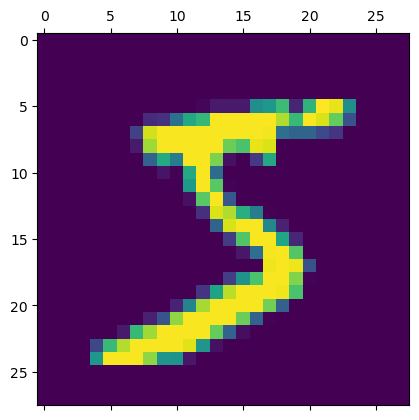

In [5]:
#plot image 

plt.matshow(x_train[0])

#print y_train

print(y_train[0])

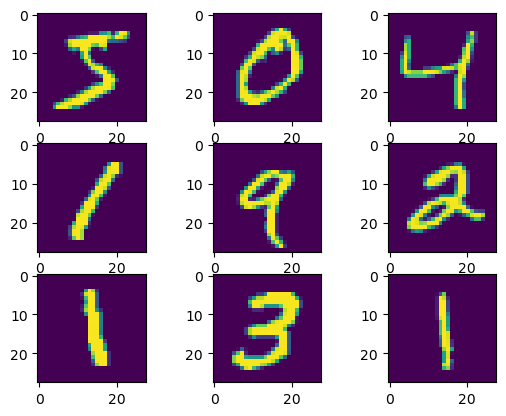

In [6]:
# plot first few images

for i in range(9):
    
    # define subplot with 3 rows and 3 columns, index from 1 to 9
    plt.subplot(3,3,i+1)
    
    # plot pixel data
    plt.imshow(x_train[i])
    
# show the figure
plt.show()

In [7]:
#normalize data by scaling

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
#flatten x grids into longitudanal input

image_vector_size = 28*28

x_train = x_train.reshape(len(x_train), image_vector_size)
x_test = x_test.reshape(len(x_test), image_vector_size)

print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [32]:
# Define Neural Network model architecture

# Sequential groups a linear stack of layers into a tf.keras.Model
# Sequential Documentation: https://keras.io/models/sequential/
# Dense layers are "fully connected" layers

#define dense sequential neural network with 784 inputs, 10 outputs 
# one hidden layer with 32 neurons and sigmoid activation function

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = keras.Sequential()
model.add(keras.layers.Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary() #print the model architecture

'''
The resulting architecture has 25,450 tunable parameters. 
From the input layer to the hidden layer there are 784*32 = 25,088 weights. 
The hidden layer has 32 nodes so there are 32 biases. This brings us to 25,088 + 32 = 25,120 parameters.

From the hidden layer to the output layer there are 32*10 = 320 weights.
Each of the ten nodes adds a single bias bringing us to 25,120 + 320 + 10 = 25,450 total parameters.
'''

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


'\nThe resulting architecture has 25,450 tunable parameters. \nFrom the input layer to the hidden layer there are 784*32 = 25,088 weights. \nThe hidden layer has 32 nodes so there are 32 biases. This brings us to 25,088 + 32 = 25,120 parameters.\n\nFrom the hidden layer to the output layer there are 32*10 = 320 weights.\nEach of the ten nodes adds a single bias bringing us to 25,120 + 320 + 10 = 25,450 total parameters.\n'

In [33]:
#compile and train the neural network model

#Sparse_categorial_entropy is used as there are multiple labels provided as integers.

model.compile(optimizer="sgd", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#track history of training the model

history= model.fit(x_train, y_train, batch_size=120, epochs=50, validation_split=0.2)


Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 2.1766 - accuracy: 0.3352 - val_loss: 2.0050 - val_accuracy: 0.5600
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 1.8698 - accuracy: 0.6206 - val_loss: 1.7226 - val_accuracy: 0.6793
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 1.6067 - accuracy: 0.6902 - val_loss: 1.4708 - val_accuracy: 0.7388
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 1.3830 - accuracy: 0.7346 - val_loss: 1.2659 - val_accuracy: 0.7756
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 1.2053 - accuracy: 0.7680 - val_loss: 1.1057 - val_accuracy: 0.8027
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 1.0672 - accuracy: 0.7926 - val_loss: 0.9817 - val_accuracy: 0.8217
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.9594 - accuracy: 0.8121 - val_loss: 0.8846 - val_accuracy: 0.8369
Epoch 

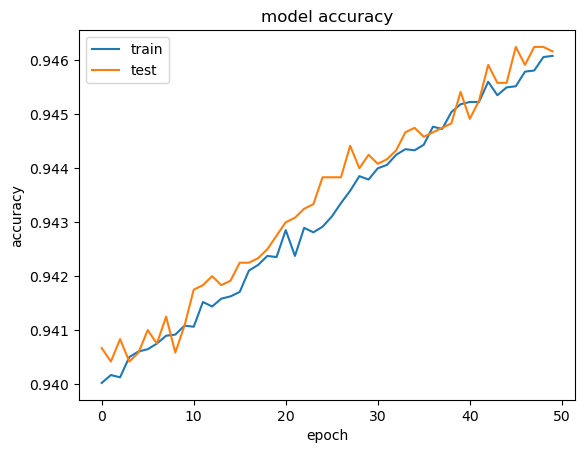

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

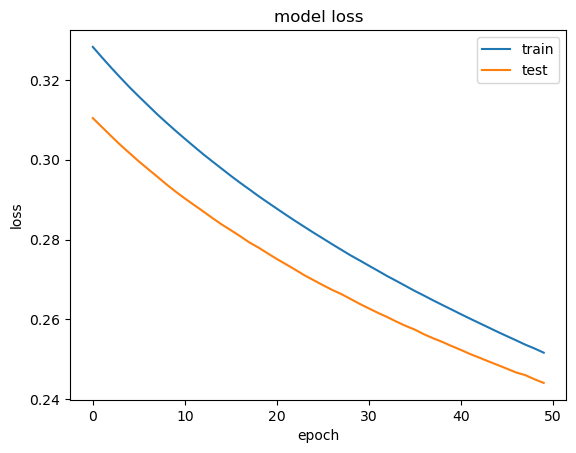

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#Evaluate Model on test data
model.evaluate(x_test, y_test)

In [ ]:
#predictions

y_pred = model.predict(x_test)

In [ ]:
#lets predict the first data on test set

#reload the data that has not been flattened
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 
plt.matshow(x_test[0])

In [ ]:
#print the predictions for the first data on test set

y_pred[0]

In [ ]:
#argmax function finds the argument that gives the maximum value from a target function.

np.argmax(y_pred[0])

In [ ]:
#confusion matrix

y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

In [ ]:
#plot confusion matrix with seaborn heatmap

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')